# Brain Tumor Segmentation

In this Notebook we work on segmentation of tumor from 2D-MRI images.

Starting with Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np

from PIL import Image
import random
import matplotlib.pyplot as plt
import glob
import cv2

Now Specifying the data path where our data is stored and loading the image data to a List named orig.

In [2]:
data_path=glob.glob("Brain_Tumor_Detection/yes/*.jpg")

In [3]:
orig =[] 

In [4]:

for img_name in data_path:
        img=cv2.imread(img_name) #reading the image from the file using opencv
        resized=cv2.resize(img,(256,256)) #now resizing the image to 256x256 format
        orig.append(resized) #Appending the resized Image to the orig List

Convert img list type to numpy array

In [5]:
orig = np.array(orig) 

In [6]:
data=orig
orig.shape #checking the shape of the array
#here Shape of the array is 1500,256,256,3 which means it has 1500 files with 256x256 dimension and 3 color channels

(1500, 256, 256, 3)

Displaying first few Images using matplotlib

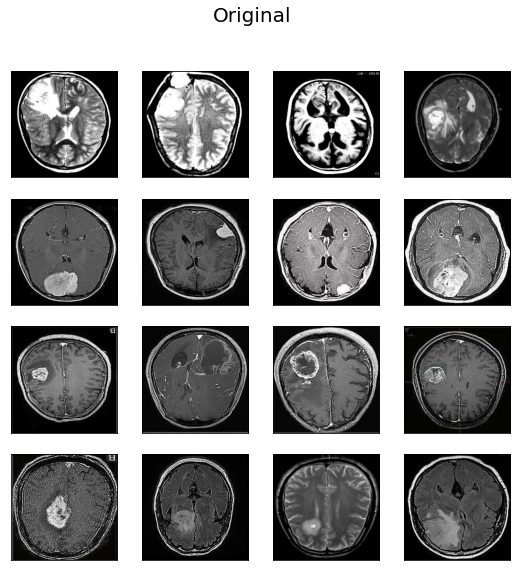

In [7]:
plt.figure(figsize=(9,9))
for i, img in enumerate(data[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
plt.suptitle("Original", fontsize=20)
plt.show()

### Applying some preprocessing befor masking and segmentation

In [8]:
from tqdm.notebook import tqdm

#### Grayscaling Image

In [9]:
gray = np.array([cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in tqdm(orig)])

  0%|          | 0/1500 [00:00<?, ?it/s]

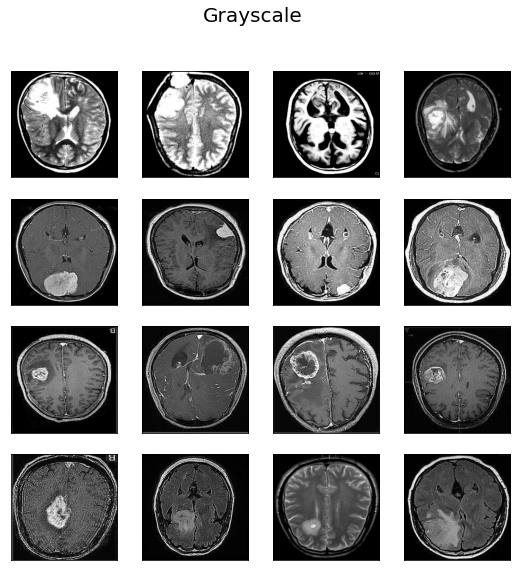

In [10]:
plt.figure(figsize=(9,9))
for i, img in enumerate(gray[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("Grayscale", fontsize=20)
plt.show()

In [11]:
gray.shape

(1500, 256, 256)

In [12]:
gray[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Applying Threshold to the Image

In [13]:
thresh = [cv2.threshold(img, 155, 255, cv2.THRESH_BINARY_INV)[1] for img in tqdm(gray)]

  0%|          | 0/1500 [00:00<?, ?it/s]

In [14]:
opt_thresh  = [cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)[0] for img in tqdm(gray)]

  0%|          | 0/1500 [00:00<?, ?it/s]

In [15]:
thresh[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

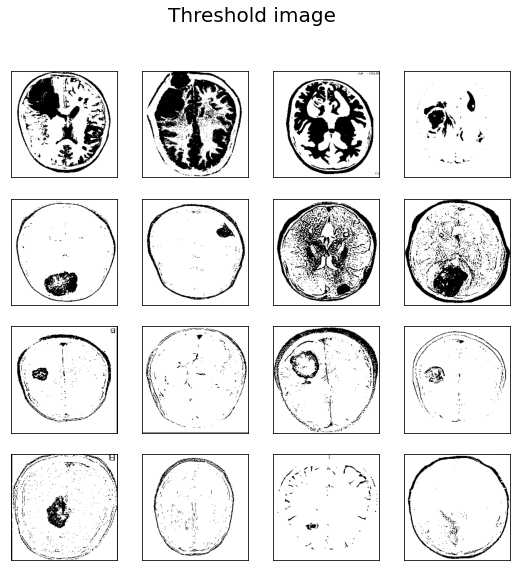

In [16]:
plt.figure(figsize=(9,9))
for i, img in enumerate(thresh[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("Threshold image", fontsize=20)
plt.show()

#### Now Detecting Edges on the Threshold Images

In [17]:
edges = [cv2.Canny(img, 170, 230) for img in tqdm(thresh)]

  0%|          | 0/1500 [00:00<?, ?it/s]

In [18]:
edges[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

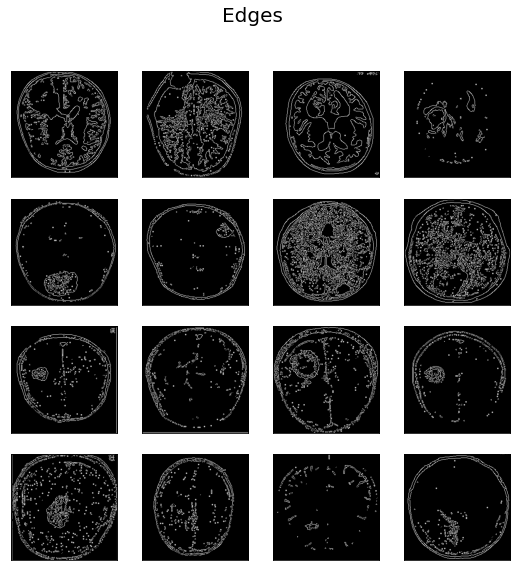

In [19]:
plt.figure(figsize=(9,9))
for i, edge in enumerate(edges[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB))
plt.suptitle("Edges", fontsize=20)
plt.show()

#### Applying Dilation to Thicken the Edges

In [20]:
kernel = np.ones((2, 2), np.uint8)
dilate = [cv2.dilate(img,None) for img in tqdm(edges)]

  0%|          | 0/1500 [00:00<?, ?it/s]

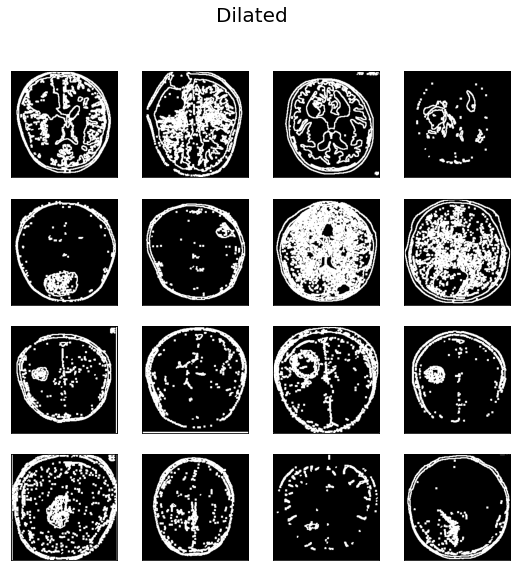

In [21]:
plt.figure(figsize=(9,9))
for i, edge in enumerate(dilate[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB))
plt.suptitle("Dilated", fontsize=20)
plt.show()

## MASKING AND SEGMENTATION

Creating Mask and Segment from the Dialted Images

In [22]:
masked = []
segmented = []
for i, img in tqdm(enumerate(dilate)):
    cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-3]
    mask = np.zeros((256,256), np.uint8)
    masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv2.bitwise_and(orig[i], orig[i], mask=mask)
    segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

0it [00:00, ?it/s]

Visualizing the applied Mask and segment on the Image

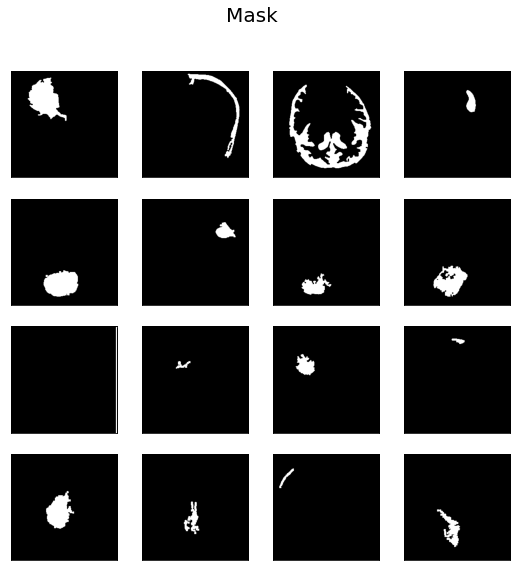

In [23]:
plt.figure(figsize=(9,9))
for i, maskimg in enumerate(masked[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maskimg, cmap='gray')
plt.suptitle("Mask", fontsize=20)
plt.show()

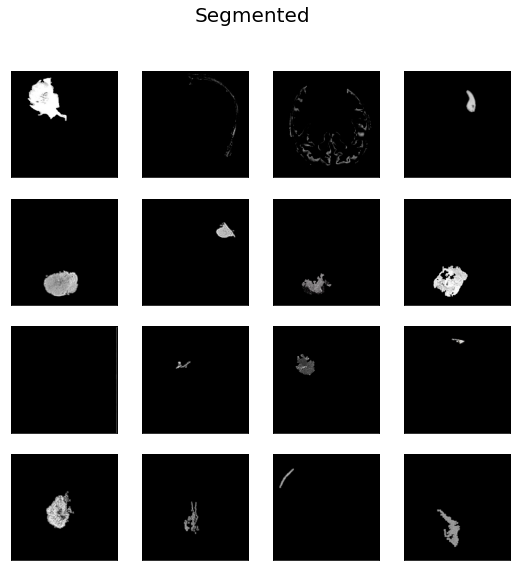

In [24]:
plt.figure(figsize=(9,9))
for i, segimg in enumerate(segmented[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
plt.suptitle("Segmented", fontsize=20)
plt.show()

In [25]:
thresh_binary = [cv2.threshold(img, 155, 255, cv2.THRESH_BINARY)[1] for img in tqdm(gray)]

  0%|          | 0/1500 [00:00<?, ?it/s]

In [26]:
closed = []
for img in thresh_binary:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 4))
    closed.append(cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel))
    

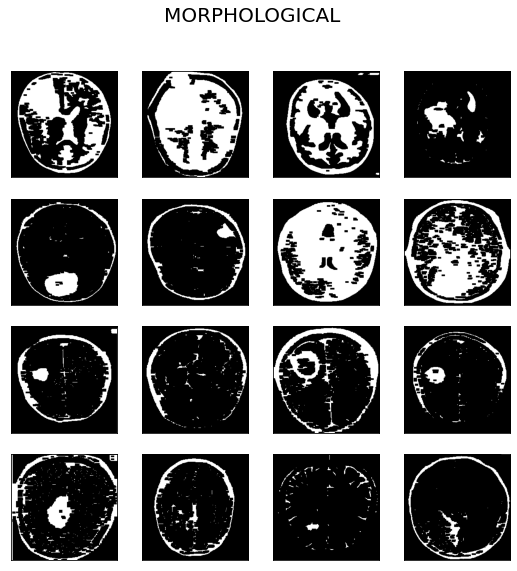

In [27]:
plt.figure(figsize=(9,9))
for i, img in enumerate(closed[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("MORPHOLOGICAL", fontsize=20)
plt.show()

In [28]:
eroded , dilated = [],[]
for img in closed:
    eroded.append(cv2.erode(img, None, iterations = 1))
    dilated.append(cv2.dilate(img, None, iterations = 1))

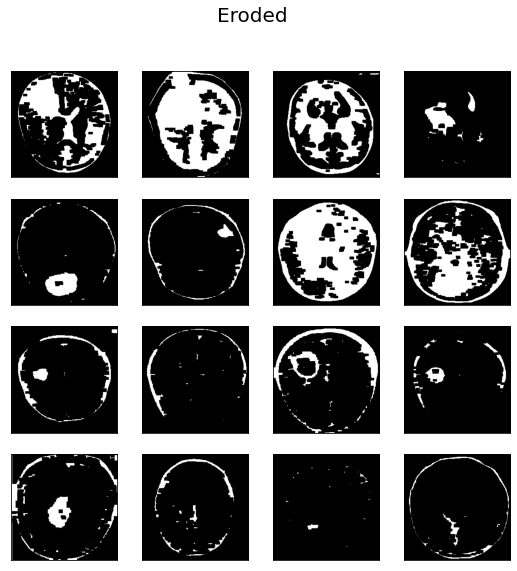

In [29]:
plt.figure(figsize=(9,9))
for i, img in enumerate(eroded[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("Eroded", fontsize=20)
plt.show()

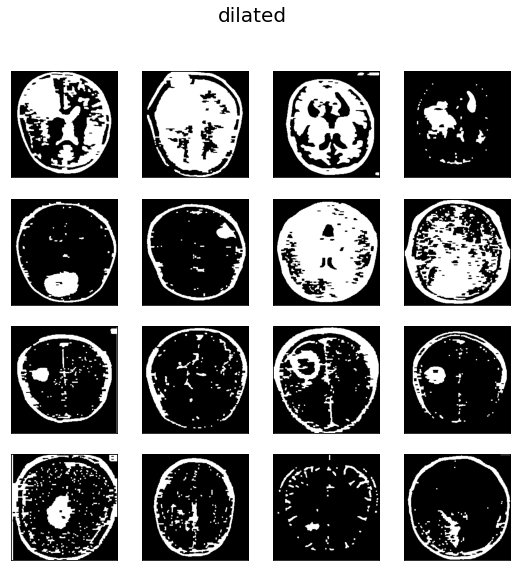

In [30]:
plt.figure(figsize=(9,9))
for i, img in enumerate(dilated[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("dilated", fontsize=20)
plt.show()

In [31]:
can =[] 
for img in dilated:
    sigma=0.33
    v = np.median(img)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    can.append(cv2.Canny(img, lower, upper))

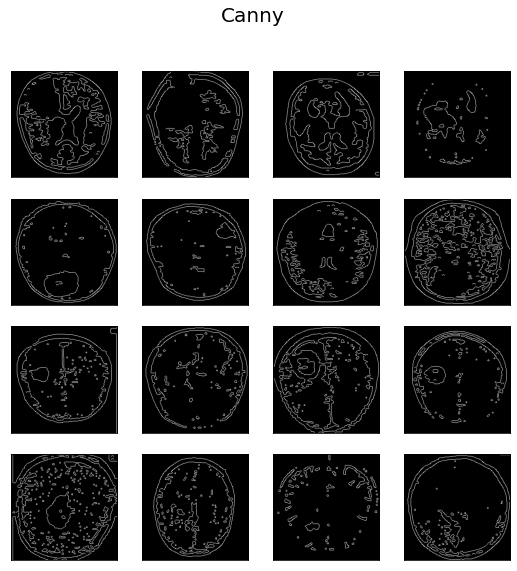

In [32]:
plt.figure(figsize=(9,9))
for i, maskimg in enumerate(can[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maskimg, cmap='gray')
plt.suptitle("Canny", fontsize=20)
plt.show()

In [33]:
masked = []
segmented = []
for i, img in tqdm(enumerate(can)):
    cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv2.bitwise_and(orig[i], orig[i], mask=mask)
    segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

0it [00:00, ?it/s]

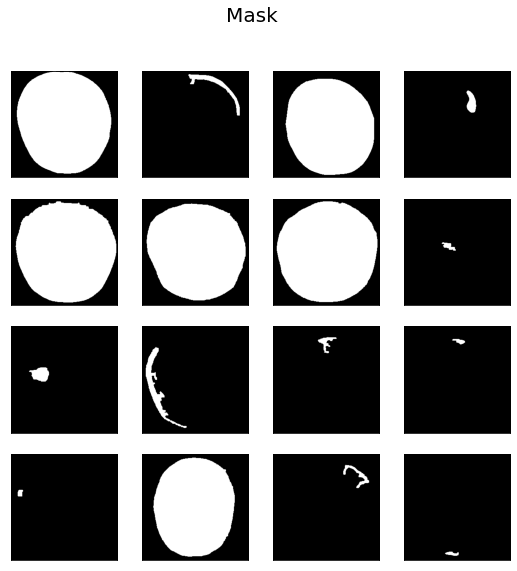

In [34]:
plt.figure(figsize=(9,9))
for i, maskimg in enumerate(masked[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maskimg, cmap='gray')
plt.suptitle("Mask", fontsize=20)
plt.show()